1、乘的权重(w)都一样，加的偏置(b)也一样。b变成矩阵时使用广播机制。神经网络的参数w和b是网络需要学习的，其他是已知的。

2、学习能力越强，有可能会把输入样本中噪声的规律也学到。我们要学习数据本身真实数据的规律，学习能力要有泛化能力。

3、该神经网络共3层；第一层是8维到6维的非线性空间变换，第二层是6维到4维的非线性空间变换，第三层是4维到1维的非线性空间变换。

4、本算法中torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用。

5、torch.sigmoid、torch.nn.Sigmoid和torch.nn.functional.sigmoid的区别。  

     torch.sigmoid：这是一个方法，拥有Parametrs和Returns。
     
     torch.nn.Sigmoid：可以看到官网文档在左上角标注着显眼的CLASS，同时根据Examples我们可以得出结论，torch.nn.Sigmoid在我们的神经网络中使用时，我们应该将其看作是网络的一层，而不是简单的函数使用。
     
     torch.nn.functional.sigmoid：事实上，torch.nn.functional从这个包名就能看出来，这个包里的都是函数。同样的，按照官网的文档的内容，我们也可以判断出torch.nn.funtional.sigmoid是一个方法，可以直接在我们的神经网络的forward中使用，并不需要在init的时候初始化。也就是说torch.nn.functional.sigmoid和torch.sigmoid没有什么区别，同理，本文对于其他的激活函数一样适用。

0 0.6978269219398499
1 0.6919670701026917
2 0.6867673397064209
3 0.6821522116661072
4 0.6780552864074707
5 0.6744174957275391
6 0.6711863279342651
7 0.6683153510093689
8 0.6657638549804688
9 0.6634954214096069
10 0.6614779829978943
11 0.6596830487251282
12 0.6580856442451477
13 0.6566635966300964
14 0.6553971767425537
15 0.6542689800262451
16 0.6532635688781738
17 0.652367353439331
18 0.6515682339668274
19 0.6508553624153137
20 0.6502193808555603
21 0.649651825428009
22 0.6491450667381287
23 0.6486926078796387
24 0.6482884883880615
25 0.647927463054657
26 0.647604763507843
27 0.6473163962364197
28 0.6470586061477661
29 0.6468280553817749
30 0.646621823310852
31 0.6464372873306274
32 0.6462723016738892
33 0.646124541759491
34 0.6459922790527344
35 0.6458739042282104
36 0.6457679271697998
37 0.6456729173660278
38 0.6455878615379333
39 0.6455116271972656
40 0.6454433798789978
41 0.6453821659088135
42 0.6453272104263306
43 0.6452780365943909
44 0.6452339291572571
45 0.6451942324638367
46 0

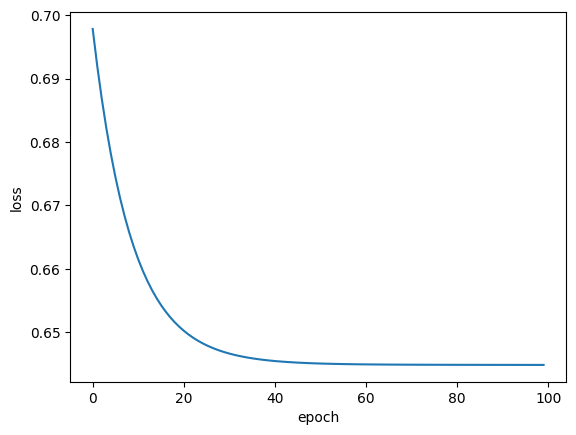

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# prepare dataset
xy = np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
 
# design model using class
 
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6) # 输入数据x的特征是8维，x有8个特征
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) # y hat
        return x
 
 
model = Model()
 
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')  
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
 
epoch_list = []
loss_list = []
# training cycle forward, backward, update
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    epoch_list.append(epoch)
    loss_list.append(loss.item())
 
    optimizer.zero_grad()
    loss.backward()
 
    optimizer.step()
 
 
plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

如果想查看某些层的参数，以神经网络的第一层参数为例，可按照以下方法进行。

In [2]:
# 参数说明
# 第一层的参数：
layer1_weight = model.linear1.weight.data
layer1_bias = model.linear1.bias.data
print("layer1_weight", layer1_weight)
print("layer1_weight.shape", layer1_weight.shape)
print("layer1_bias", layer1_bias)
print("layer1_bias.shape", layer1_bias.shape)

layer1_weight tensor([[-0.2187,  0.1461,  0.1455, -0.0752, -0.0081, -0.0699,  0.2679, -0.1380],
        [ 0.1553, -0.1746,  0.0404, -0.1331, -0.3359, -0.1558, -0.1915, -0.2330],
        [ 0.0701,  0.1855,  0.3510,  0.3379, -0.0403,  0.2173, -0.0991,  0.0835],
        [ 0.1868, -0.0608, -0.1916, -0.1525, -0.3069, -0.3277, -0.2889,  0.1210],
        [-0.2556, -0.2905, -0.1862, -0.2477, -0.1441, -0.3481,  0.3529,  0.3056],
        [-0.0268, -0.1867,  0.0097, -0.2236,  0.0692, -0.2418,  0.0503,  0.1810]])
layer1_weight.shape torch.Size([6, 8])
layer1_bias tensor([-0.0953,  0.0175,  0.1755,  0.2271,  0.0734,  0.2338])
layer1_bias.shape torch.Size([6])


In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# prepare dataset
xy = np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
print("input data.shape", x_data.shape)
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
 
# print(x_data.shape)
# design model using class
 
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 2)
        self.linear4 = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) # y hat
        x = self.sigmoid(self.linear4(x))  # y hat
        return x
 
 
model = Model()
 
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
 
# training cycle forward, backward, update
for epoch in range(1000000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    # print(epoch, loss.item())
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
    if epoch%100000 == 99999:
        y_pred_label = torch.where(y_pred>=0.5,torch.tensor([1.0]),torch.tensor([0.0]))
 
        acc = torch.eq(y_pred_label, y_data).sum().item()/y_data.size(0)
        print("loss = ",loss.item(), "acc = ",acc)

input data.shape torch.Size([759, 8])
loss =  0.4029952883720398 acc =  0.8102766798418972
loss =  0.3849959671497345 acc =  0.8181818181818182
loss =  0.34997278451919556 acc =  0.8379446640316206
loss =  0.3128194212913513 acc =  0.8616600790513834
loss =  0.28534674644470215 acc =  0.8722002635046113
loss =  0.271647185087204 acc =  0.8801054018445322
loss =  0.26644477248191833 acc =  0.8814229249011858
loss =  0.2626357972621918 acc =  0.8814229249011858
loss =  0.2597437798976898 acc =  0.8814229249011858
loss =  0.25777575373649597 acc =  0.8814229249011858
